# 📌 Project: Fake News Detection

The rapid spread of false or misleading information on online platforms poses significant challenges to society, influencing public opinion and decision-making. In this project, we aim to build a machine learning model that can accurately classify news articles as real or fake based on their textual content.

We will use Natural Language Processing (NLP) techniques such as tokenization, stopword removal, and TF-IDF vectorization to preprocess the text data. Various classification algorithms, including Logistic Regression, Naive Bayes, and ensemble methods, will be applied to determine which model provides the best accuracy and generalization.

This project will help in understanding the end-to-end NLP pipeline, from data preprocessing to model evaluation, while addressing a real-world problem in the domain of information verification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [7]:
fake_df = pd.read_csv("fake.csv")
true_df = pd.read_csv("true.csv")


fake_df['label'] = 0  # 0 = Fake
true_df['label'] = 1  # 1 = True


df = pd.concat([fake_df, true_df], axis=0)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle rows

print(df.shape)      # rows & columns
print(df.head())     # first 5 rows
df.info()            # column types & nulls


(44898, 5)
                                               title  \
0  BREAKING: OBAMA’S “Director Of Diversity” Dona...   
1  Lebanese offshore oil and gas licensing round ...   
2  WOW! ALEX JONES Releases Secretly Recorded Int...   
3  MN: Mayoral Candidate Wants To DISARM COPS Aft...   
4  ‘Journalistic Malpractice’: CNN Slammed for ‘B...   

                                                text    subject  \
0  Of course anyone on Obama s  Team Fundamental ...  left-news   
1  BEIRUT (Reuters) - Lebanon s Energy Minister o...  worldnews   
2  Alex Jones scooped NBC and Megyn Kelly with a ...  left-news   
3   Minneapolis mayoral candidate Raymond Dehn pr...  left-news   
4  21st Century Wire says This definitely needed ...    US_News   

                 date  label  
0         Feb 4, 2016      0  
1  November 10, 2017       1  
2        Jun 15, 2017      0  
3        Jul 30, 2017      0  
4        June 8, 2016      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries

In [10]:
df.isnull().sum()
df['label'].value_counts()


label
0    23481
1    21417
Name: count, dtype: int64

In [11]:
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

df.groupby('label')[['text_length', 'word_count']].mean()


,text_length,word_count
label,,
0,2547.396235,423.197905
1,2383.278517,385.640099


In [13]:
pip install wordcloud

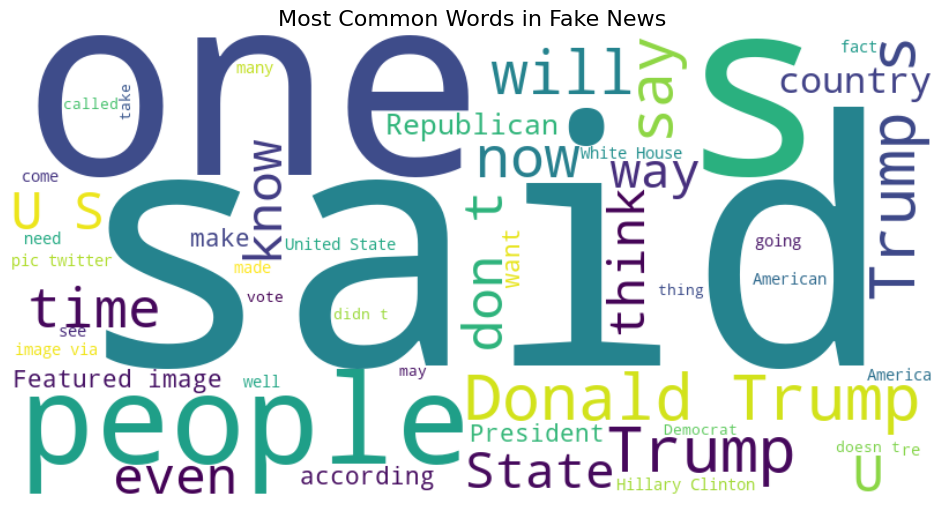

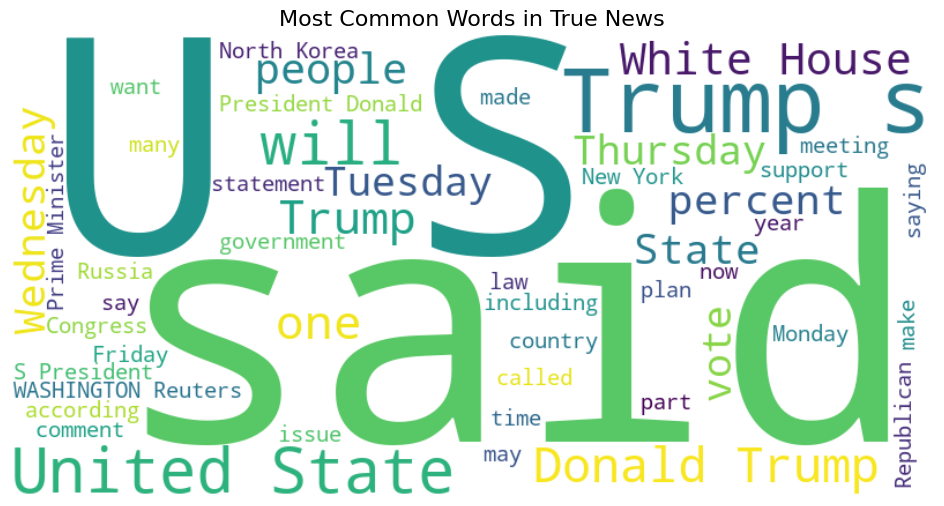

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate fake and true news
fake_text = " ".join(df[df['label'] == 0]['text'])
true_text = " ".join(df[df['label'] == 1]['text'])

# WordCloud for Fake News
plt.figure(figsize=(12,6))
wc_fake = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(fake_text)
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Fake News", fontsize=16)
plt.show()

# WordCloud for True News
plt.figure(figsize=(12,6))
wc_true = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(true_text)
plt.imshow(wc_true, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in True News", fontsize=16)
plt.show()


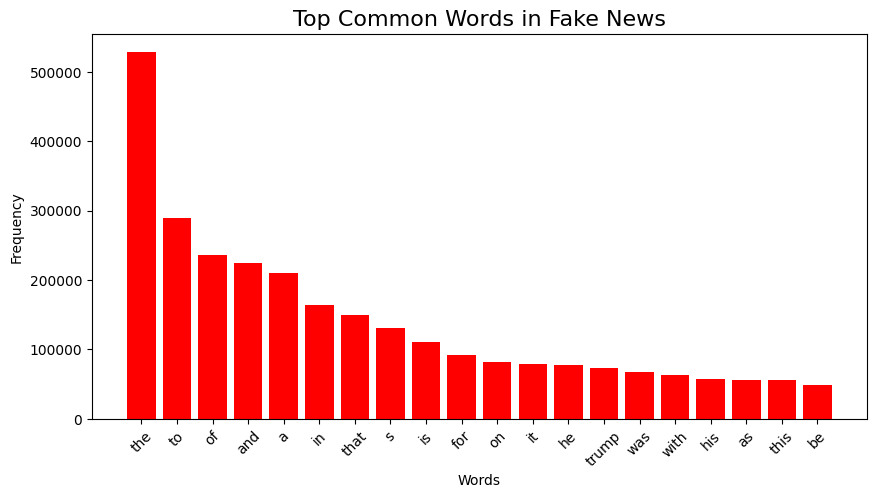

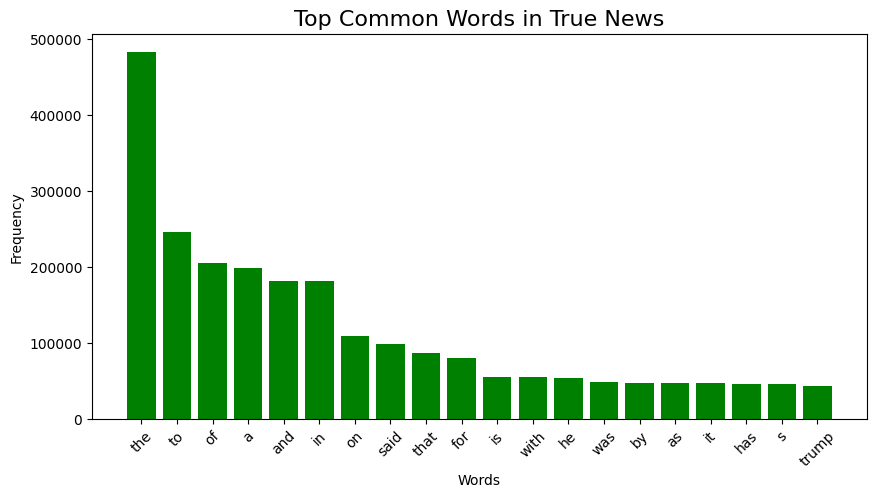

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Function to get most common words from text data
def get_most_common_words(texts, n=20):
    # Combine all texts into one string
    all_words = ' '.join(texts).lower()
    # Remove punctuation and numbers
    all_words = re.sub(r'[^a-z\s]', '', all_words)
    # Split into words
    word_list = all_words.split()
    # Count frequency
    return Counter(word_list).most_common(n)

# Get top words for fake and true news
fake_top_words = get_most_common_words(df[df['label'] == 0]['text'])
true_top_words = get_most_common_words(df[df['label'] == 1]['text'])

# Convert to DataFrames for plotting
fake_df_words = pd.DataFrame(fake_top_words, columns=['Word', 'Count'])
true_df_words = pd.DataFrame(true_top_words, columns=['Word', 'Count'])

# Plot Fake News common words
plt.figure(figsize=(10,5))
plt.bar(fake_df_words['Word'], fake_df_words['Count'], color='red')
plt.title("Top Common Words in Fake News", fontsize=16)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Plot True News common words
plt.figure(figsize=(10,5))
plt.bar(true_df_words['Word'], true_df_words['Count'], color='green')
plt.title("Top Common Words in True News", fontsize=16)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [16]:
#Data Cleaning
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text


df['text'] = df['text'].apply(lambda x: clean_text(str(x)))

print(df.head())


                                               title  \
0  BREAKING: OBAMA’S “Director Of Diversity” Dona...   
1  Lebanese offshore oil and gas licensing round ...   
2  WOW! ALEX JONES Releases Secretly Recorded Int...   
3  MN: Mayoral Candidate Wants To DISARM COPS Aft...   
4  ‘Journalistic Malpractice’: CNN Slammed for ‘B...   

                                                text    subject  \
0  of course anyone on obama s  team fundamental ...  left-news   
1  beirut reuters  lebanon s energy minister on f...  worldnews   
2  alex jones scooped nbc and megyn kelly with a ...  left-news   
3   minneapolis mayoral candidate raymond dehn pr...  left-news   
4   century wire says this definitely needed to b...    US_News   

                 date  label  text_length  word_count  
0         Feb 4, 2016      0         4633         696  
1  November 10, 2017       1         1635         267  
2        Jun 15, 2017      0         1535         271  
3        Jul 30, 2017      0        

✅ Accuracy: 0.9854120267260579

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4733
           1       0.98      0.99      0.98      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



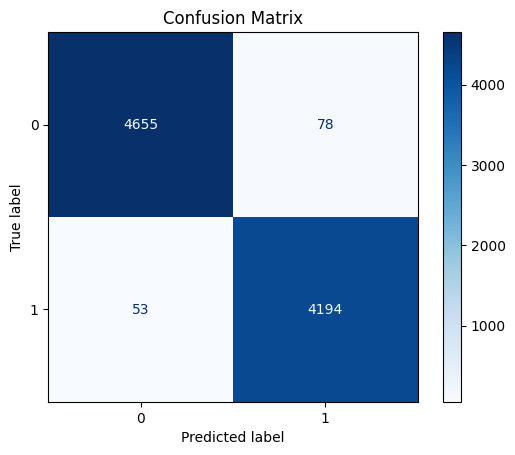

In [24]:
from sklearn.linear_model import LogisticRegression

# 1️⃣ Combine title and text for better context
df['content'] = df['title'] + " " + df['text']

# 2️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['content'], df['label'], test_size=0.2, random_state=42
)

# 3️⃣ TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 4️⃣ Train Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_tfidf, y_train)

# 5️⃣ Predictions
y_pred = model.predict(X_test_tfidf)

# 6️⃣ Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


1. What is TF-IDF?

TF-IDF stands for:

TF → Term Frequency – how often a word appears in a document compared to total words in that document.

IDF → Inverse Document Frequency – how unique that word is across all documents.

It’s a way to convert raw text into numerical features that reflect both importance in the document and rarity across the dataset.

2. Why not just use word counts?

If you only count words (Bag of Words), common words like "the", "is", "and" dominate the features, even though they carry little meaning.
TF-IDF downweights common words and upweights rare but meaningful words.

Example:

Word	Document Count	TF-IDF Weight
the	5000	low
cancer	12	high
3. Formula (Intuition Version)
Term Frequency (TF):
𝑇
𝐹
(
𝑡
,
𝑑
)
=
Number of times term t appears in document d
Total number of terms in document d
TF(t,d)=
Total number of terms in document d
Number of times term t appears in document d
	​

Inverse Document Frequency (IDF):
𝐼
𝐷
𝐹
(
𝑡
)
=
log
⁡
Total number of documents
Number of documents containing t
IDF(t)=log
Number of documents containing t
Total number of documents
	​

Combine:
𝑇
𝐹
_
𝐼
𝐷
𝐹
(
𝑡
,
𝑑
)
=
𝑇
𝐹
(
𝑡
,
𝑑
)
×
𝐼
𝐷
𝐹
(
𝑡
)
TF_IDF(t,d)=TF(t,d)×IDF(t)
4. What this means in practice

Rare words in the dataset → high IDF → higher weight if they appear in a document.

Very common words → low IDF → their contribution is reduced.

Produces sparse matrices (lots of zeros), which work well for ML models like Logistic Regression, SVM, etc.